In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [18]:
# import CSV
df = pd.read_csv(os.path.join("Resources", "ufc-master.csv"))
df = df.fillna(df.mean())

df.head()

C:\Users\nickm\anaconda3\envs\PythonAdv\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Alistair Overeem,Alexander Volkov,150,-182,150.000000,54.945055,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,3.107143,2.768759,0.293701,0.243701,0.403319,0.33189,1.245671,0.920274,0.137807,0.138889
1,Cory Sandhagen,Frankie Edgar,-400,300,25.000000,300.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Red,...,3.107143,2.768759,0.293701,0.243701,0.403319,0.33189,1.245671,0.920274,0.137807,0.138889
2,Alexandre Pantoja,Manel Kape,-125,100,80.000000,100.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Red,...,3.107143,2.768759,0.293701,0.243701,0.403319,0.33189,1.245671,0.920274,0.137807,0.138889
3,Diego Ferreira,Beneil Dariush,-125,105,80.000000,105.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,3.107143,2.768759,0.293701,0.243701,0.403319,0.33189,1.245671,0.920274,0.137807,0.138889
4,Michael Johnson,Clay Guida,-225,175,44.444444,175.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,3.107143,2.768759,0.293701,0.243701,0.403319,0.33189,1.245671,0.920274,0.137807,0.138889


In [19]:
# Assign X (data) and y (target)

X = df[['B_fighter', 'R_fighter', 'B_age','R_age', 'age_dif', 'B_Height_cms', 'R_Height_cms', 'height_dif', 'B_Reach_cms', 'R_Reach_cms', 'reach_dif', 'B_sig_str_attempted_bout', 'R_sig_str_attempted_bout', 'sig_str_dif', 'B_sig_str_landed_bout', 'R_sig_str_landed_bout', 'B_sub_attempts_bout', 'R_sub_attempts_bout', 'sub_dif', 'B_td_attempted_bout', 'R_td_attempted_bout', 'B_td_landed_bout', 'R_td_landed_bout', 'B_tot_str_attempted_bout', 'R_tot_str_attempted_bout', 'B_tot_str_landed_bout', 'R_tot_str_landed_bout', 'B_kd_bout', 'R_kd_bout', 'B_avg_SIG_STR_landed', 'R_avg_SIG_STR_landed', 'B_avg_TD_landed','R_avg_TD_landed']]

y = df["Winner"]

print(X.shape, y.shape)


(4566, 33) (4566,)


In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
non_numeric = [i for i in X.columns if X[i].dtypes == 'object']
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

for i in X[non_numeric]:
    X[i] = label_encoder.fit_transform(X[i].astype(str))

C:\Users\nickm\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=1)

## Random Forest Model

In [6]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)

In [7]:
rfc.fit(X_train, y_train)

pred_rfc = rfc.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred_rfc))

0.7565674255691769


In [9]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred_rfc)) # returns precision recall f1-score and support
print(confusion_matrix(y_test, pred_rfc)) # returns the exact number of TN FP FN TP

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       471
           1       0.76      0.85      0.80       671

    accuracy                           0.76      1142
   macro avg       0.75      0.74      0.74      1142
weighted avg       0.76      0.76      0.75      1142

[[291 180]
 [ 98 573]]


## Logistic Regression Model

In [10]:
from sklearn.linear_model import LogisticRegression
logr_classifier = LogisticRegression(max_iter=1000)
logr_classifier

LogisticRegression(max_iter=1000)

In [11]:
logr_classifier.fit(X_train, y_train)

D:\Users\lynel\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000)

In [12]:
print(f"Training Data Score: {logr_classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {logr_classifier.score(X_test, y_test)}")

Training Data Score: 0.763142523364486
Testing Data Score: 0.7618213660245184


In [13]:
pred_logr = logr_classifier.predict(X_test)
print(f"First 10 Predictions:   {pred_logr[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 1 0 1 0 1 1 0 0]
First 10 Actual labels: [0, 0, 1, 0, 0, 0, 0, 1, 0, 0]


In [14]:
pd.DataFrame({"Prediction": pred_logr, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,0,0
2,1,1
3,0,0
4,1,0
...,...,...
1137,0,1
1138,1,1
1139,0,0
1140,1,0


In [15]:
# Accuracy Score
print(accuracy_score(y_test, pred_logr))

0.7618213660245184


In [16]:
# Confusion Matrix
# Classification Report

print(classification_report(y_test, pred_logr)) # returns precision recall f1-score and support
print(confusion_matrix(y_test, pred_logr)) # returns the exact number of TN FP FN TP

              precision    recall  f1-score   support

           0       0.80      0.56      0.66       471
           1       0.75      0.90      0.82       671

    accuracy                           0.76      1142
   macro avg       0.77      0.73      0.74      1142
weighted avg       0.77      0.76      0.75      1142

[[265 206]
 [ 66 605]]


## K Nearest Neighbor Model

In [17]:
# Create a StandardScater model
from sklearn.preprocessing import StandardScaler

#Fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.666
k: 3, Train/Test Score: 0.846/0.700
k: 5, Train/Test Score: 0.803/0.703
k: 7, Train/Test Score: 0.783/0.713
k: 9, Train/Test Score: 0.775/0.718
k: 11, Train/Test Score: 0.766/0.719
k: 13, Train/Test Score: 0.760/0.718
k: 15, Train/Test Score: 0.764/0.715
k: 17, Train/Test Score: 0.761/0.721
k: 19, Train/Test Score: 0.755/0.725
k: 21, Train/Test Score: 0.756/0.715
k: 23, Train/Test Score: 0.751/0.706
k: 25, Train/Test Score: 0.752/0.706
k: 27, Train/Test Score: 0.753/0.708
k: 29, Train/Test Score: 0.751/0.718


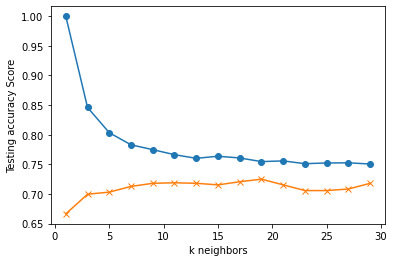

In [18]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 31, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 31, 2), train_scores, marker='o')
plt.plot(range(1, 31, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn.fit(X_train_scaled, y_train)
pred_knn = knn.predict(X_test_scaled)

In [20]:
# Accuracy Score
print(accuracy_score(y_test, pred_knn))

0.7154115586690017


In [21]:
# Confusion Matrix
# Classification Report
print(classification_report(y_test, pred_knn)) # returns precision recall f1-score and support
print(confusion_matrix(y_test, pred_knn)) # returns the exact number of TN FP FN TP

              precision    recall  f1-score   support

           0       0.69      0.56      0.62       471
           1       0.73      0.83      0.77       671

    accuracy                           0.72      1142
   macro avg       0.71      0.69      0.70      1142
weighted avg       0.71      0.72      0.71      1142

[[262 209]
 [116 555]]


## Support Vector Machine Model

In [22]:
from sklearn import svm
from sklearn.svm import SVC
svm_clf = svm.SVC(kernel ="linear")
svm_clf.fit(X_train_scaled, y_train)
pred_svm_clf = svm_clf.predict(X_test_scaled)

In [23]:
# Accuracy Score
print(accuracy_score(y_test, pred_svm_clf))

0.7644483362521891


In [24]:
# Confusion Matrix
# Classification Report
print(classification_report(y_test, pred_svm_clf)) 
print(confusion_matrix(y_test, pred_svm_clf)) 

              precision    recall  f1-score   support

           0       0.86      0.51      0.64       471
           1       0.73      0.94      0.82       671

    accuracy                           0.76      1142
   macro avg       0.80      0.73      0.73      1142
weighted avg       0.79      0.76      0.75      1142

[[240 231]
 [ 38 633]]


## Neural Network MLP Model

In [25]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes = (38, 38, 38), max_iter = 500) 
mlpc.fit(X_train_scaled, y_train)
pred_mlpc = mlpc.predict(X_test_scaled)

In [26]:
# Accuracy Score
print(accuracy_score(y_test, pred_mlpc))

0.7110332749562172


In [27]:
# Confusion Matrix
# Classification Report
print(classification_report(y_test, pred_mlpc)) 
print(confusion_matrix(y_test, pred_mlpc)) 

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       471
           1       0.75      0.76      0.76       671

    accuracy                           0.71      1142
   macro avg       0.70      0.70      0.70      1142
weighted avg       0.71      0.71      0.71      1142

[[303 168]
 [162 509]]


## GridSearch

In [28]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(svm_clf, param_grid, verbose=3)

In [29]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............................C=1, gamma=0.0001; total time=   0.6s
[CV 2/5] END ..............................C=1, gamma=0.0001; total time=   0.5s
[CV 3/5] END ..............................C=1, gamma=0.0001; total time=   0.4s
[CV 4/5] END ..............................C=1, gamma=0.0001; total time=   0.5s
[CV 5/5] END ..............................C=1, gamma=0.0001; total time=   0.5s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   0.5s
[CV 2/5] END ...............................C=1, gamma=0.001; total time=   0.5s
[CV 3/5] END ...............................C=1, gamma=0.001; total time=   0.5s
[CV 4/5] END ...............................C=1, gamma=0.001; total time=   0.5s
[CV 5/5] END ...............................C=1, gamma=0.001; total time=   0.5s
[CV 1/5] END ................................C=1, gamma=0.01; total time=   0.5s
[CV 2/5] END ................................C=1,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)

In [30]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.0001}
0.7625594399624365


## Deep Learning Model

In [22]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Create a deep neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=33))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=1, activation='sigmoid'))


In [24]:
# Compile the model and fit it to the training data
deep_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
107/107 - 1s - loss: 0.6762 - accuracy: 0.5716
Epoch 2/100
107/107 - 0s - loss: 0.6471 - accuracy: 0.6224
Epoch 3/100
107/107 - 0s - loss: 0.5965 - accuracy: 0.7004
Epoch 4/100
107/107 - 0s - loss: 0.5498 - accuracy: 0.7208
Epoch 5/100
107/107 - 0s - loss: 0.5205 - accuracy: 0.7412
Epoch 6/100
107/107 - 0s - loss: 0.5021 - accuracy: 0.7450
Epoch 7/100
107/107 - 0s - loss: 0.4959 - accuracy: 0.7506
Epoch 8/100
107/107 - 0s - loss: 0.4838 - accuracy: 0.7602
Epoch 9/100
107/107 - 0s - loss: 0.4793 - accuracy: 0.7585
Epoch 10/100
107/107 - 0s - loss: 0.4774 - accuracy: 0.7573
Epoch 11/100
107/107 - 0s - loss: 0.4732 - accuracy: 0.7588
Epoch 12/100
107/107 - 0s - loss: 0.4717 - accuracy: 0.7555
Epoch 13/100
107/107 - 0s - loss: 0.4688 - accuracy: 0.7629
Epoch 14/100
107/107 - 0s - loss: 0.4678 - accuracy: 0.7631
Epoch 15/100
107/107 - 0s - loss: 0.4662 - accuracy: 0.7614
Epoch 16/100
107/107 - 0s - loss: 0.4652 - accuracy: 0.7640
Epoch 17/100
107/107 - 0s - loss: 0.4647 - accura

In [25]:
# Evaluate test accuracy
model_loss, model_accuracy = deep_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

36/36 - 1s - loss: 0.4522 - accuracy: 0.7478
Loss: 0.4522034823894501, Accuracy: 0.7478108406066895
